In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import os,  sys

sys.path.append('/Users/benjaminwong/JupyterNotebooks/masters_pfti/notebooks/python/')
from clean import BlockModelCleaner

In [2]:
block_model = BlockModelCleaner.get_processed_data()

In [3]:
block_model

,centroid_x,centroid_y,centroid_z,dim_x,dim_y,dim_z,volume,strat,alteration,ug_fault,...,form5,form6,form7,structure,AG,AU,CU,pload_all,rqd,sg
block_id,,,,,,,,,,,,,,,,,,,,,
0,735929.7992,9549147.685,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
1,735941.6194,9549138.450,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
2,735953.4395,9549129.215,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
3,735965.2597,9549119.980,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
4,735977.0799,9549110.745,2197.5,15,15,15,3375,1,0,0,...,1,1,1,0,0.001,0.001,0.0001,-9.0,-9.0,2.649738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973271,738703.5131,9548750.903,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973272,738715.3333,9548741.668,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076
973273,738727.1534,9548732.433,3112.5,15,15,15,3375,8,0,0,...,4,2,2,0,0.001,0.001,0.0001,-9.0,-9.0,2.585076


In [25]:
block_model.columns

Index(['centroid_x', 'centroid_y', 'centroid_z', 'dim_x', 'dim_y', 'dim_z',
       'volume', 'strat', 'alteration', 'ug_fault', 'rock', 'form3', 'form4',
       'form5', 'form6', 'form7', 'structure', 'AG', 'AU', 'CU', 'pload_all',
       'rqd', 'sg'],
      dtype='object')

In [26]:
block_model['CU'].describe()

count    973276.000000
mean          0.109501
std           0.311342
min           0.000100
25%           0.000100
50%           0.000100
75%           0.066785
max           6.000222
Name: CU, dtype: float64

In [44]:
filtered_block_model = block_model.query('CU > 0.001')

In [28]:
# %matplotlib widget

# fig = plt.figure()
# ax = plt.axes(projection='3d')

# ax.scatter3D(
#     block_model['centroid_x'],
#     block_model['centroid_y'],
#     block_model['centroid_z'],
#     c='lightgrey',
#     alpha=0.005
# )

# ax.scatter3D(
#     filtered_block_model['centroid_x'],
#     filtered_block_model['centroid_y'],
#     filtered_block_model['centroid_z'],
#     c='pink',
#     alpha=0.2
# )

# ax.azim = 0
# ax.elev = 40

# fig.tight_layout()

In [46]:
pts = filtered_block_model.iloc[:, 0:3].to_numpy()

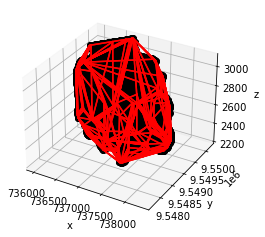

In [47]:
# %matplotlib widget

from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

# 8 points defining the cube corners

hull = ConvexHull(pts)

fig = plt.figure()
ax = plt.axes(projection='3d')

# Plot defining corner points
ax.plot(pts.T[0], pts.T[1], pts.T[2], "ko")

# 12 = 2 * 6 faces are the simplices (2 simplices per square face)
for s in hull.simplices:
    s = np.append(s, s[0])  # Here we cycle back to the first coordinate
    ax.plot(pts[s, 0], pts[s, 1], pts[s, 2], "r-")

# Make axis labels
for i in ["x", "y", "z"]:
    eval("ax.set_{:s}label('{:s}')".format(i, i))

plt.show()